<a href="https://colab.research.google.com/github/AviratGupta/finger-identifier/blob/master/my_first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
!kaggle datasets download -d aviratgupta/identifyfingers

 56% 5.00M/8.88M [00:00<00:00, 49.2MB/s]
100% 8.88M/8.88M [00:00<00:00, 56.2MB/s]


In [ ]:
!unzip "*.zip"

Archive:  identifyfingers.zip
  inflating: fingers/1/106.jpg       
  inflating: fingers/1/107.jpg       
  inflating: fingers/1/108.jpg       
  inflating: fingers/1/117.jpg       
  inflating: fingers/1/155.jpg       
  inflating: fingers/1/163.jpg       
  inflating: fingers/1/164.jpg       
  inflating: fingers/1/165.jpg       
  inflating: fingers/1/173.jpg       
  inflating: fingers/1/174.jpg       
  inflating: fingers/1/175.jpg       
  inflating: fingers/1/176.jpg       
  inflating: fingers/1/177.jpg       
  inflating: fingers/1/178.jpg       
  inflating: fingers/1/179.jpg       
  inflating: fingers/1/180.jpg       
  inflating: fingers/1/181.jpg       
  inflating: fingers/1/182.jpg       
  inflating: fingers/1/183.jpg       
  inflating: fingers/1/184.jpg       
  inflating: fingers/1/185.jpg       
  inflating: fingers/1/186.jpg       
  inflating: fingers/1/207.jpg       
  inflating: fingers/1/208.jpg       
  inflating: fingers/1/209.jpg       
  inflating: fingers

In [ ]:
os.listdir("fingers")

['3', '1', '4', '2', '5']

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
bs = 64

In [ ]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("fingers"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

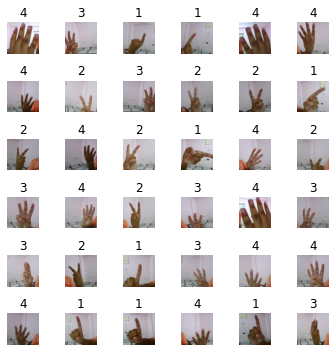

In [ ]:
data.show_batch(rows=6, figsize=(5,5))

In [ ]:
print(data.classes)
len(data.classes)

['1', '2', '3', '4', '5']


5

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.184925,0.122665,0.943396,03:49
1,0.131545,0.036103,0.990566,03:52
2,0.121698,0.105885,0.971698,03:55
3,0.109020,0.091367,0.962264,03:58


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.makedirs("/content/drive/My Drive/my_projects/finger-identifier",exist_ok=True)

In [ ]:
my_dir="/content/drive/My Drive/my_projects/finger-identifier"

In [ ]:
learn.save(my_dir+"/image-1")

In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.056118,0.099330,0.971698,03:51
1,0.044176,0.091497,0.971698,03:50


In [ ]:
learn.load("/content/drive/My Drive/my_projects/finger-identifier/image-1")

Learner(data=ImageDataBunch;

Train: LabelList (427 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
3,3,3,3,3
Path: fingers;

Valid: LabelList (106 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
2,4,3,3,3
Path: fingers;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 

In [ ]:
learn.export(my_dir+"/export.pkl")

In [ ]:
predictor = load_learner(my_dir)
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class


In [ ]:
test_img=os.listdir("test_fingers")

2


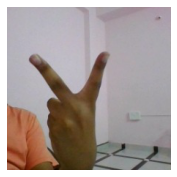

In [ ]:
index = 0
print(my_predictor("test_fingers/"+test_img[index]))
img = open_image("test_fingers/"+test_img[index])
img.show()

In [ ]:
from google.colab import files
my_file=files.upload()

Saving ai.jpg to ai.jpg


In [ ]:
import cv2
test_files=os.listdir("test_fingers")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("test_fingers/"+test_file)
  cv2.imwrite("ai.jpg",img)
  ans_text=my_predictor("ai.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 1
  color = (0,128,0)
  thickness = 3
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [ ]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p ../final_result.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 -

In [ ]:
!wget -O "song.mp3" "https://pagalsong.in/uploads/systemuploads/mp3/Malang%20-%20Unleash%20The%20Madness/Malang%20(Title%20Track)%20128%20Kbps.mp3"

--2020-07-25 18:33:14--  https://pagalsong.in/uploads/systemuploads/mp3/Malang%20-%20Unleash%20The%20Madness/Malang%20(Title%20Track)%20128%20Kbps.mp3
Resolving pagalsong.in (pagalsong.in)... 104.27.138.65, 104.27.139.65, 172.67.209.19, ...
Connecting to pagalsong.in (pagalsong.in)|104.27.138.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4694817 (4.5M) [audio/mpeg]
Saving to: ‘song.mp3’

song.mp3            100%[===================>]   4.48M  3.21MB/s    in 1.4s    

2020-07-25 18:33:16 (3.21 MB/s) - ‘song.mp3’ saved [4694817/4694817]



In [ ]:
!wget -O "video.mp4" "https://drive.google.com/uc?id=1P5TY6G9b7NeNqV9JjSeJy5le42t2FiYT"

--2020-07-25 18:33:07--  https://drive.google.com/uc?id=1P5TY6G9b7NeNqV9JjSeJy5le42t2FiYT
Resolving drive.google.com (drive.google.com)... 74.125.69.139, 74.125.69.113, 74.125.69.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.69.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sdqsoed74kh2mbgea093ihcchm2kfvmj/1595701950000/01290084068609300209/*/1P5TY6G9b7NeNqV9JjSeJy5le42t2FiYT [following]
--2020-07-25 18:33:07--  https://doc-0k-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sdqsoed74kh2mbgea093ihcchm2kfvmj/1595701950000/01290084068609300209/*/1P5TY6G9b7NeNqV9JjSeJy5le42t2FiYT
Resolving doc-0k-20-docs.googleusercontent.com (doc-0k-20-docs.googleusercontent.com)... 74.125.124.132, 2607:f8b0:4001:c13::84
Connecting to doc-0k-20-docs.googleusercontent.com (doc-0k-20-docs.googleusercontent.com)|74.125.124

In [ ]:
!ffmpeg  -i "video.mp4" -ss 0:0:57 -t 451 -i "song.mp3" -map 0:v:0 -map 1:a:0 -y out.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [ ]:
!pip install -U kora
from kora.drive import upload_public

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.4.21)


In [ ]:
url = upload_public('out.mp4')
from IPython.display import HTML
#HTML(f"""<video src={url} width=420 controls/>""")
HTML(f"""<video src={url} width="320" height="240" controls/>""")

In [ ]:
url

'https://drive.google.com/uc?id=1hwO6s3QzFFeux7qGTIItAgK3wATVI5Ot'